## Matuszynska2016

In [1]:
%%capture
cd ..

In [2]:
from model import Matuszynska2016
import numpy as np
from modelbase2 import Simulator

In [3]:
m = Matuszynska2016()

m.get_stoichiometries()

,v_PSII,v_PQ,v_ATPsynth,v_Leak,v_ATPcons,v_ATPact,v_Xcyc,v_PsbSP
PQH_2,1.00,-1.00,0.000000,0.00,0.0,0.0,0.0,0.0
H_lu,0.02,0.04,-0.046667,-0.01,0.0,0.0,0.0,0.0
ATP_st,0.00,0.00,1.000000,0.00,-1.0,0.0,0.0,0.0
ATPase_ac,0.00,0.00,0.000000,0.00,0.0,1.0,0.0,0.0
Vx,0.00,0.00,0.000000,0.00,0.0,0.0,-1.0,0.0
psbS,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,-1.0


In [ ]:
"rtol":1e-16,"atol":1e-6

/home/elouen/Documents/GreenSloth/models/Matuszynska2016/model/derived_quantities.py:8: RuntimeWarning: invalid value encountered in log10
  return -np.log10(H*2.5e-4)
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1719462973569/work/sundials/src/cvodes/cvodes.c:8032][cvHandleFailure] At t = 923.858 and h = 0.00708524, the corrector convergence test failed repeatedly or with |h| = hmin.


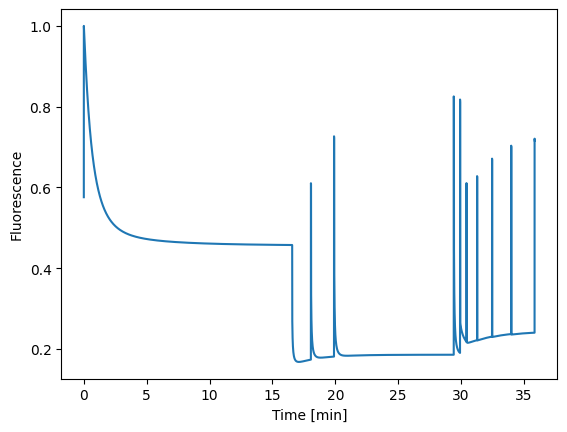

/home/elouen/Documents/GreenSloth/models/Matuszynska2016/model/derived_quantities.py:8: RuntimeWarning: invalid value encountered in log10
  return -np.log10(H*2.5e-4)
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1719462973569/work/sundials/src/cvodes/cvodes.c:8032][cvHandleFailure] At t = 915.858 and h = 0.0070855, the corrector convergence test failed repeatedly or with |h| = hmin.


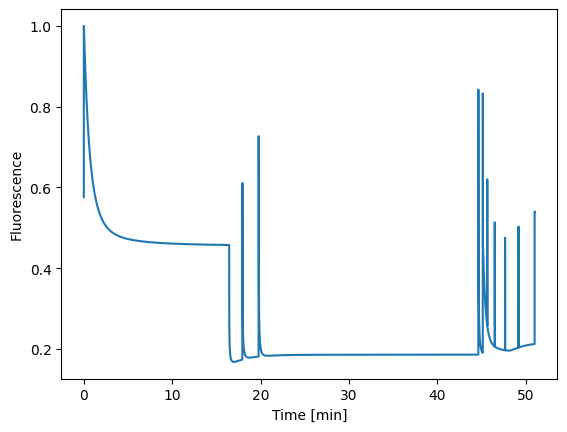

/home/elouen/Documents/GreenSloth/models/Matuszynska2016/model/derived_quantities.py:8: RuntimeWarning: invalid value encountered in log10
  return -np.log10(H*2.5e-4)
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1719462973569/work/sundials/src/cvodes/cvodes.c:8032][cvHandleFailure] At t = 917.191 and h = 0.00700774, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1719462973569/work/sundials/src/cvodes/cvodes.c:8032][cvHandleFailure] At t = 1078.19 and h = 0.00813425, the corrector convergence test failed repeatedly or with |h| = hmin.
[ERROR][rank 0][/home/conda/feedstock_root/build_artifacts/sundials-split_1719462973569/work/sundials/src/cvodes/cvodes.c:8028][cvHandleFailure] At t = 4269.34 and h = 0.916344, the error test failed repeatedly or with |h| = hmin.


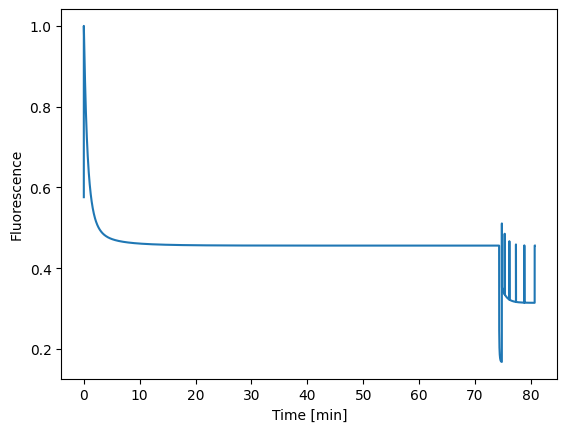

In [15]:
import matplotlib.pyplot as plt
from matplotlib import patches
    
y0d =  {"P": 0, "H": 6.32975752e-05, "E": 0, "A": 25.0, "Pr": 1, "V": 1}
    
#Function for PAM experiment
def changingLight(model, lights, interval):
    s = Simulator(model)
    s.integrator.atol=1e-2
    s.integrator.rtol=1e-2
    dt = 0
    for i in range(len(interval)):
        s.update_parameter('pfd', lights[i])
        dt += interval[i]
        s.simulate(dt)
    return s
    
    
##########################################################################
# REPRODUCE FIGURE 4 MATUSZYNSKA 4
##########################################################################

#Value of actinic light was calculated using the cpdf function
    
tprot = np.array([  1.        ,   0.8       ,  27.86666667,   0.8       ,
                  29.86666667,   0.8       ,  49.53333333,   0.8       ,
                  70.2       ,   0.8       ,  91.2       ,   0.8       ,
                  110.86666667,   0.8       , 131.2       ,   0.8       ,
                  151.53333333,   0.8       , 172.53333333,   0.8       ,
                  29.2       ,   0.8       ,  49.2       ,   0.8       ,
                  69.53333333,   0.8       ,  89.2       ,   0.8       ,
                  109.53333333,   0.8       , 570.53333333,   0.8       ,
                  29.2       ,   0.8       ,  29.86666667,   0.8       ,
                  49.86666667,   0.8       ,  70.53333333,   0.8       ,
                  90.53333333,   0.8       , 110.86666667,   0.8       ])
    
ProtPFDs = np.array([   0.   , 5000.   ,    0.   , 5000.   ,  220.003, 5000.   ,
                     220.003, 5000.   ,  220.003, 5000.   ,  220.003, 5000.   ,
                     220.003, 5000.   ,  220.003, 5000.   ,  220.003, 5000.   ,
                     220.003, 5000.   ,    0.   , 5000.   ,    0.   , 5000.   ,
                     0.   , 5000.   ,    0.   , 5000.   ,    0.   , 5000.   ,
                     0.   , 5000.   ,    0.   , 5000.   ,  220.003, 5000.   ,
                     220.003, 5000.   ,  220.003, 5000.   ,  220.003, 5000.   ,
                     220.003, 5000.   ])
    

    
PAM1 = changingLight(Matuszynska2016(), ProtPFDs, tprot)
res = PAM1.get_full_concs()

F = res['Fluo']
plt.plot(res.index/60, F/max(F))
plt.xlabel('Time [min]')
plt.ylabel('Fluorescence')
plt.show()

tprot = np.array([   1.        ,    0.8       ,   28.2       ,    0.8       ,
                  29.53333333,    0.8       ,   49.53333333,    0.8       ,
                  69.86666667,    0.8       ,   89.53333333,    0.8       ,
                  109.53333333,    0.8       ,  130.53333333,    0.8       ,
                  149.86666667,    0.8       ,  169.86666667,    0.8       ,
                  29.53333333,    0.8       ,   49.2       ,    0.8       ,
                  69.86666667,    0.8       ,   89.53333333,    0.8       ,
                  109.53333333,    0.8       , 1490.53333333,    0.8       ,
                  29.2       ,    0.8       ,   29.53333333,    0.8       ,
                  49.86666667,    0.8       ,   69.2       ,    0.8       ,
                  90.2       ,    0.8       ,  109.2       ,    0.8       ])
    
ProtPFDs = np.array([   0.   , 5000.   ,    0.   , 5000.   ,  320.007, 5000.   ,
                     320.007, 5000.   ,  320.007, 5000.   ,  320.007, 5000.   ,
                     320.007, 5000.   ,  320.007, 5000.   ,  320.007, 5000.   ,
                     320.007, 5000.   ,    0.   , 5000.   ,    0.   , 5000.   ,
                     0.   , 5000.   ,    0.   , 5000.   ,    0.   , 5000.   ,
                     0.   , 5000.   ,    0.   , 5000.   ,  320.007, 5000.   ,
                     320.007, 5000.   ,  320.007, 5000.   ,  320.007, 5000.   ,
                     320.007, 5000.   ])
    
PAM2 = changingLight(Matuszynska2016(), ProtPFDs, tprot)
res = PAM2.get_full_concs()

F = res['Fluo']
plt.plot(res.index/60, F/max(F))
plt.xlabel('Time [min]')
plt.ylabel('Fluorescence')
plt.show()
    
    
    
tprot = np.array([   1.        ,    0.8       ,   27.86666667,    0.8       ,
                  29.53333333,    0.8       ,   49.86666667,    0.8       ,
                  69.2       ,    0.8       ,   90.2       ,    0.8       ,
                  109.86666667,    0.8       ,  129.86666667,    0.8       ,
                  150.86666667,    0.8       ,  170.86666667,    0.8       ,
                  29.2       ,    0.8       ,   49.2       ,    0.8       ,
                  69.53333333,    0.8       ,   89.86666667,    0.8       ,
                  109.2       ,    0.8       , 3270.53333333,    0.8       ,
                  29.53333333,    0.8       ,   29.53333333,    0.8       ,
                  49.53333333,    0.8       ,   69.86666667,    0.8       ,
                  89.2       ,    0.8       ,  110.2       ,    0.8       ])
    
ProtPFDs = np.array([   0.   , 5000.   ,    0.   , 5000.   ,  900.003, 5000.   ,
                     900.003, 5000.   ,  900.003, 5000.   ,  900.003, 5000.   ,
                     900.003, 5000.   ,  900.003, 5000.   ,  900.003, 5000.   ,
                     900.003, 5000.   ,    0.   , 5000.   ,    0.   , 5000.   ,
                     0.   , 5000.   ,    0.   , 5000.   ,    0.   , 5000.   ,
                     0.   , 5000.   ,    0.   , 5000.   ,  900.003, 5000.   ,
                     900.003, 5000.   ,  900.003, 5000.   ,  900.003, 5000.   ,
                     900.003, 5000.   ])
    
PAM3 = changingLight(Matuszynska2016(), ProtPFDs, tprot)
res = PAM3.get_full_concs()

F = res['Fluo']
plt.plot(res.index/60, F/max(F))
plt.xlabel('Time [min]')
plt.ylabel('Fluorescence')
plt.show()
